In [1]:
from sympy import *
init_printing()
 

# Prototyping
create expression to test, using binomial coefficient because it's everywhere and simple

In [2]:
x, y, xprime, yprime=symbols('x, y, xp, yp')

In [3]:
xthing=x+y**2

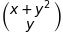

In [4]:
Test=binomial(xthing, y); Test

## prototype

In [5]:
nSelf_arg, kSelf_arg=Test.args; nSelf_arg.free_symbols, kSelf_arg

In [6]:
nSelf_argN=lambdify(tuple(nSelf_arg.free_symbols), nSelf_arg, dummify=False)
nSelf_argNargs=list(nSelf_argN.__code__.co_varnames)
nSelf_argNargs

['x', 'y']

In [7]:
kSelf_argN=lambdify(tuple(kSelf_arg.free_symbols), kSelf_arg, dummify=False)
kSelf_argNargs=list(kSelf_argN.__code__.co_varnames)
kSelf_argNargs

['y']

In [8]:
binomialN_args=list(set(nSelf_argNargs).union(set(kSelf_argNargs)))
binomialN_args

['y', 'x']

In [9]:
from scipy.special import binom as binomalN

In [10]:
TestN=f"lambda {','.join(binomialN_args)}: binomalN( nSelf_argN({','.join(nSelf_argNargs)}), kSelf_argN({','.join(kSelf_argNargs)}) )"
TestN

'lambda y,x: binomalN( nSelf_argN(x,y), kSelf_argN(y) )'

In [11]:
TestNN=eval(TestN)

## Prototype Testing

In [12]:
TestNN(x=3,y=2)

In [13]:
Test.subs({x:3, y:2})

## Result (Pass)

# Bind functional proto-code to class 

In [14]:
class binomial2(binomial):
    def __NumericalMap_Defualt__(self):
        #get the arguments of n, k of binomial(n,k)
        nSelf_arg, kSelf_arg = self.args

        #lambdify the n argument and collect terms, for moment using clean lambdify in testing
        nSelf_argN = lambdify(tuple(nSelf_arg.free_symbols), nSelf_arg, dummify=False)
        nSelf_argNargs = list(nSelf_argN.__code__.co_varnames)


        #repeat for the k argument
        kSelf_argN = lambdify(tuple(kSelf_arg.free_symbols), kSelf_arg, dummify=False)
        kSelf_argNargs = list(kSelf_argN.__code__.co_varnames)

        #get concise argument list for final generated expression
        binomialN_args = list(set(nSelf_argNargs).union(set(kSelf_argNargs)))

        #import the mapping from sympy binomial to scipy.special.binom

        from scipy.special import binom as binomalN
        Numerclized=f"lambda {','.join(binomialN_args)}: binomalN( nSelf_argN({','.join(nSelf_argNargs)}), kSelf_argN({','.join(kSelf_argNargs)}) )"

        return eval(Numerclized)

## create mark2 instance of binomial coefficient 



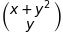

In [15]:
Test3=binomial2(xthing, y); Test3

## Test mark2

In [16]:
Test3N=Test3.__NumericalMap_Defualt__()
Test3N(x=3,y=2)

## Result (Pass)

# To Do

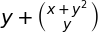

In [17]:
Test4=y+binomial2(xthing, y); Test4

And I have no idea how to make `. __NumericalMap_Defualt__(self)` be called when `lambdify` acts on it and bind to to the rest of the expression